In [190]:
import pandas as pd
import numpy as np
import os
import statistics
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [191]:
Mediclaim= pd.read_csv("D:\HealthCare Project\Dataset\Insurance_Dataset.csv", low_memory=False)

In [192]:
print(Mediclaim.head(4))

  Area_Service Hospital County  Certificate_num  Hospital Id  \
0   Western NY        Allegany         226700.0         37.0   
1   Western NY        Allegany         226700.0         37.0   
2   Western NY        Allegany         226700.0         37.0   
3   Western NY        Allegany         226700.0         37.0   

                Hospital Name          Age zip_code_3_digits Gender  \
0  Cuba Memorial Hospital Inc     30 to 49               147      F   
1  Cuba Memorial Hospital Inc  70 or Older               147      F   
2  Cuba Memorial Hospital Inc     30 to 49               147      F   
3  Cuba Memorial Hospital Inc      0 to 17               147      F   

  Cultural_group          ethnicity  ...        Payment_typology_1  \
0          White  Not Span/Hispanic  ...    Blue Cross/Blue Shield   
1          White  Not Span/Hispanic  ...                  Medicare   
2          White  Not Span/Hispanic  ...    Blue Cross/Blue Shield   
3          White  Not Span/Hispanic  ...  P

In [193]:
print(Mediclaim.columns) #Prints the column names of the dataset

Index(['Area_Service', 'Hospital County', 'Certificate_num', 'Hospital Id',
       'Hospital Name', 'Age', 'zip_code_3_digits', 'Gender', 'Cultural_group',
       'ethnicity', 'Days_spend_hsptl', 'Admission_type', 'Home or self care,',
       'year_discharge', 'ccs_diagnosis_code', 'ccs_diagnosis_description',
       'ccs_procedure_code', 'ccs_procedure_description',
       'apr_drg_description', 'apr_mdc_description', 'Code_illness',
       'Description_illness', 'Mortality risk', 'Surg_Description',
       'Payment_typology_1', 'payment_typology_2', 'payment_typology_3',
       'Weight_baby', 'Abortion', 'Emergency dept_yes/No', 'Tot_charg',
       'Tot_cost', 'ratio_of_total_costs_to_total_charges', 'Result'],
      dtype='object')


In [194]:
#Removing unnecessary columns from the dataset
Mediclaim.drop(['Hospital Id','Certificate_num','Area_Service','Hospital County','payment_typology_2',\
                'payment_typology_3','zip_code_3_digits','year_discharge','Abortion','ethnicity',\
               'ccs_diagnosis_code','ccs_procedure_code','Weight_baby'],axis=1,inplace= True)

In [195]:
print(Mediclaim.columns)

Index(['Hospital Name', 'Age', 'Gender', 'Cultural_group', 'Days_spend_hsptl',
       'Admission_type', 'Home or self care,', 'ccs_diagnosis_description',
       'ccs_procedure_description', 'apr_drg_description',
       'apr_mdc_description', 'Code_illness', 'Description_illness',
       'Mortality risk', 'Surg_Description', 'Payment_typology_1',
       'Emergency dept_yes/No', 'Tot_charg', 'Tot_cost',
       'ratio_of_total_costs_to_total_charges', 'Result'],
      dtype='object')


# Exploratory Data Analysis

In [196]:
Mediclaim.loc[Mediclaim["Result"]=="Genuine"]

,Hospital Name,Age,Gender,Cultural_group,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_description,ccs_procedure_description,apr_drg_description,...,Code_illness,Description_illness,Mortality risk,Surg_Description,Payment_typology_1,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result
0,Cuba Memorial Hospital Inc,30 to 49,F,White,4,Elective,Home or Self Care,Pneumonia (except that caused by tuberculosis ...,NO PROC,Other pneumonia,...,1,Minor,Minor,Medical,Blue Cross/Blue Shield,Y,5511.95,5582.49,1.012798,Genuine
1,Cuba Memorial Hospital Inc,70 or Older,F,White,4,Urgent,Short-term Hospital,Skin and subcutaneous tissue infections,NO PROC,Cellulitis & other skin infections,...,3,Major,Major,Medical,Medicare,Y,4783.20,5162.82,1.079365,Genuine
2,Cuba Memorial Hospital Inc,30 to 49,F,White,3,Urgent,Home or Self Care,Pneumonia (except that caused by tuberculosis ...,NO PROC,Other pneumonia,...,1,Minor,Minor,Medical,Blue Cross/Blue Shield,Y,3829.15,4056.52,1.059379,Genuine
4,Cuba Memorial Hospital Inc,70 or Older,F,White,3,Elective,Home or Self Care,Pneumonia (except that caused by tuberculosis ...,NO PROC,Other pneumonia,...,2,Moderate,Moderate,Medical,Medicare,Y,3418.18,3370.87,0.986161,Genuine
5,Cuba Memorial Hospital Inc,0 to 17,F,White,1,Elective,Home or Self Care,Appendicitis and other appendiceal conditions,NO PROC,Other digestive system diagnoses,...,1,Minor,Minor,Medical,Medicaid,Y,1386.10,1919.46,1.384794,Genuine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,M,White,29,Emergency,Skilled Nursing Home,Phlebitis; thrombophlebitis and thromboembolism,OT OR PRCS VES NOT HEAD,Peripheral & other vascular disorders,...,4,Extreme,Extreme,Medical,Medicare,Y,322219.69,66534.62,0.206488,Genuine
1048570,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,F,Other Race,6,Emergency,Skilled Nursing Home,Cardiac dysrhythmias,ORAL AND DENTAL SVCS,Cardiac arrhythmia & conduction disorders,...,2,Moderate,Moderate,Medical,Medicare,Y,69650.41,13896.82,0.199522,Genuine
1048571,Montefiore Medical Center - Henry & Lucy Moses...,0 to 17,F,Other Race,2,Emergency,Home or Self Care,Other infections; including parasitic,OTHER THERAPEUTIC PRCS,Other infectious & parasitic diseases,...,2,Moderate,Minor,Medical,Medicaid,N,13587.38,3918.35,0.288382,Genuine
1048573,Montefiore Medical Center - Henry & Lucy Moses...,30 to 49,F,Black/African American,2,Emergency,Home or Self Care,Abdominal hernia,OTHER HERNIA REPAIR,"Inguinal, femoral & umbilical hernia procedures",...,1,Minor,Minor,Surgical,Medicaid,Y,27521.41,6766.04,0.245846,Genuine


In [197]:
Mediclaim.loc[Mediclaim["Result"]=="Fraudulent"]

,Hospital Name,Age,Gender,Cultural_group,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_description,ccs_procedure_description,apr_drg_description,...,Code_illness,Description_illness,Mortality risk,Surg_Description,Payment_typology_1,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result
3,Cuba Memorial Hospital Inc,0 to 17,F,White,1,Urgent,Home or Self Care,Pneumonia (except that caused by tuberculosis ...,NO PROC,Other pneumonia,...,1,Minor,Minor,Medical,Private Health Insurance,Y,1108.20,1644.75,1.484167,Fraudulent
9,Cuba Memorial Hospital Inc,50 to 69,M,White,2,Elective,Home or Self Care,Pneumonia (except that caused by tuberculosis ...,NO PROC,Other pneumonia,...,2,Moderate,Minor,Medical,Medicare,Y,2661.61,2901.41,1.090095,Fraudulent
11,Cuba Memorial Hospital Inc,50 to 69,M,White,2,Elective,Home or Self Care,Pneumonia (except that caused by tuberculosis ...,ELECTROCARDIOGRAM,Other pneumonia,...,3,Major,Moderate,Medical,Medicare,Y,2893.96,3450.19,1.192205,Fraudulent
22,Cuba Memorial Hospital Inc,0 to 17,M,White,1,Urgent,Home or Self Care,Pneumonia (except that caused by tuberculosis ...,NO PROC,Other pneumonia,...,1,Minor,Minor,Medical,Federal/State/Local/VA,Y,1301.70,1729.54,1.328677,Fraudulent
23,Cuba Memorial Hospital Inc,50 to 69,F,White,2,Elective,Home or Self Care,Diverticulosis and diverticulitis,NO PROC,Diverticulitis & diverticulosis,...,2,Moderate,Minor,Medical,Medicare,Y,3384.50,4244.32,1.254045,Fraudulent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048557,Montefiore Medical Center - Henry & Lucy Moses...,0 to 17,F,Other Race,2,Emergency,Home or Self Care,Asthma,OTHER RESP THERAPY,Asthma,...,2,Moderate,Minor,Medical,Medicaid,Y,16889.91,4416.32,0.261477,Fraudulent
1048560,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,M,White,2,Emergency,Home or Self Care,Complication of device; implant or graft,"OT DX PRC (INTERVW,EVAL","Malfunction,reaction,complication of cardiac/v...",...,2,Moderate,Major,Medical,Private Health Insurance,N,23618.91,4417.51,0.187033,Fraudulent
1048565,Montefiore Medical Center - Henry & Lucy Moses...,0 to 17,M,Other Race,2,Emergency,Home or Self Care,Asthma,OTHER RESP THERAPY,Asthma,...,2,Moderate,Minor,Medical,Medicaid,Y,17008.95,4445.48,0.261361,Fraudulent
1048568,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,M,White,5,Emergency,Home w/ Home Health Services,Viral infection,NO PROC,Viral illness,...,3,Major,Moderate,Medical,Medicare,Y,42573.55,9196.49,0.216014,Fraudulent


In [198]:
Mediclaim.corr()

,Code_illness,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges
Code_illness,1.000000,0.291459,0.247437,-0.034142
Tot_charg,0.291459,1.000000,0.723150,-0.043201
Tot_cost,0.247437,0.723150,1.000000,0.421863
ratio_of_total_costs_to_total_charges,-0.034142,-0.043201,0.421863,1.000000


# Identification of Missing values

In [199]:
Mediclaim.isnull().sum(axis=0)

Hospital Name                             0
Age                                       0
Gender                                    0
Cultural_group                            0
Days_spend_hsptl                          0
Admission_type                            0
Home or self care,                        0
ccs_diagnosis_description                 0
ccs_procedure_description                 0
apr_drg_description                       0
apr_mdc_description                       0
Code_illness                              0
Description_illness                      42
Mortality risk                           42
Surg_Description                          0
Payment_typology_1                        0
Emergency dept_yes/No                     0
Tot_charg                                 0
Tot_cost                                  0
ratio_of_total_costs_to_total_charges     0
Result                                    0
dtype: int64

In [200]:
Mediclaim.Description_illness.mode()
Mediclaim["Mortality risk"].mode()

0    Minor
dtype: object

In [201]:
Mediclaim['Description_illness'].fillna("Moderate",inplace=True)

In [202]:
Mediclaim['Mortality risk'].fillna("Minor",inplace=True)

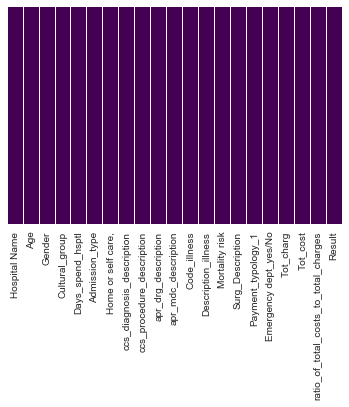

In [203]:
sns.heatmap(Mediclaim.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [204]:
print(Mediclaim.isnull().sum())

Hospital Name                            0
Age                                      0
Gender                                   0
Cultural_group                           0
Days_spend_hsptl                         0
Admission_type                           0
Home or self care,                       0
ccs_diagnosis_description                0
ccs_procedure_description                0
apr_drg_description                      0
apr_mdc_description                      0
Code_illness                             0
Description_illness                      0
Mortality risk                           0
Surg_Description                         0
Payment_typology_1                       0
Emergency dept_yes/No                    0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
dtype: int64


In [205]:
Mediclaim.describe() #Summary Statistics

,Code_illness,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.051806e+00,2.708697e+04,1.046399e+04,4.565822e-01
std,9.145785e-01,5.487428e+04,2.230366e+04,8.029246e-01
min,0.000000e+00,3.100000e-01,1.000000e-01,3.312909e-02
25%,1.000000e+00,7.402500e+03,3.234570e+03,3.135802e-01
50%,2.000000e+00,1.458988e+04,5.928480e+03,4.091384e-01
75%,3.000000e+00,2.914547e+04,1.134317e+04,5.192548e-01
max,4.000000e+00,6.196974e+06,2.562478e+06,1.575596e+02


In [206]:
Mediclaim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
Hospital Name                            1048575 non-null object
Age                                      1048575 non-null object
Gender                                   1048575 non-null object
Cultural_group                           1048575 non-null object
Days_spend_hsptl                         1048575 non-null object
Admission_type                           1048575 non-null object
Home or self care,                       1048575 non-null object
ccs_diagnosis_description                1048575 non-null object
ccs_procedure_description                1048575 non-null object
apr_drg_description                      1048575 non-null object
apr_mdc_description                      1048575 non-null object
Code_illness                             1048575 non-null int64
Description_illness                      1048575 non-null object
Mortality risk                           10

# Identification of outliers using Z-Score

In [207]:
outliers=[]

In [208]:
def detect_outliers(data):
    
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [209]:
print(len(detect_outliers(Mediclaim["Tot_charg"]))) #12140

12140


In [210]:
len(detect_outliers(Mediclaim["Tot_cost"])) #21994

21994

In [211]:
len(detect_outliers(Mediclaim['ratio_of_total_costs_to_total_charges'])) #22551

22551

# Countplot Visualization of Target Variable

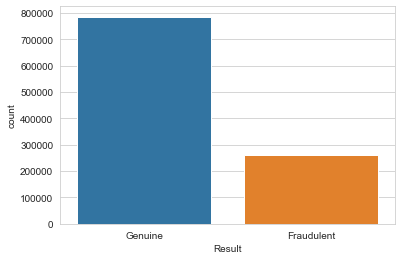

In [212]:
sns.set_style('whitegrid')
sns.countplot(x='Result',data=Mediclaim)

### From the above plot,it is clearly visible that the proportion of the claims that are genuine are more than the fraudulent claims. ###

# Univariate Analysis of Tot_charg

# First Moment Business Decision/ Measures of Central Tendency

In [177]:
Mediclaim.Tot_charg.mean() #3052
Mediclaim.Tot_charg.median() #14589.88
Mediclaim.Tot_charg.mode() #3052

0    3052.0
dtype: float64

# Second Moment Business Decision/ Measures of Dispersion

In [178]:
Mediclaim.Tot_charg.max() #6196973.5
Mediclaim.Tot_charg.min() #0.31
Range= Mediclaim.Tot_charg.max()-Mediclaim.Tot_charg.min()
print(Range) #6196973.19
np.var(Mediclaim["Tot_charg"]) #3011183744.69
np.std(Mediclaim["Tot_charg"]) #54874.25

6196973.19


54874.25393285363

# Third Moment Business Decision
#As a general thumbrule, if the skewness is <-1 or >1, then the distribution is highly skewed
#If the skewness is between -1 to -0.5 or 0.5 to 1, then the distribution is moderately skewed
#If the skewness is between -0.5 and 0.5, then the distribution is approximately symmetric

In [215]:
Mediclaim["Tot_charg"].skew() #18.1 (Highly Skewed)

18.097526908083523

# Fourth Moment Business Decision
#Normal distribution for kurtosis is 3
#Kurtosis value greater than 3, leptokurtic
#Kurtosis value between 1 and 3, platykurtic

In [214]:
Mediclaim["Tot_charg"].kurt() #775.17 (Leptokurtic)

775.1671399311822

# Graphical Visualization

# Histogram of Tot_charg

(array([1.047354e+06, 9.890000e+02, 1.500000e+02, 4.800000e+01,
        2.000000e+01, 8.000000e+00, 4.000000e+00, 0.000000e+00,
        1.000000e+00, 1.000000e+00]),
 array([3.10000000e-01, 6.19697629e+05, 1.23939495e+06, 1.85909227e+06,
        2.47878959e+06, 3.09848691e+06, 3.71818422e+06, 4.33788154e+06,
        4.95757886e+06, 5.57727618e+06, 6.19697350e+06]),
 <a list of 10 Patch objects>)

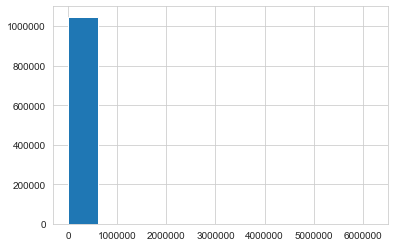

In [213]:
plt.hist(Mediclaim["Tot_charg"])

# Boxplot of Tot_charg

{'whiskers': [<matplotlib.lines.Line2D at 0x2561c8085c8>,
 'caps': [<matplotlib.lines.Line2D at 0x25629504348>,
 'boxes': [<matplotlib.lines.Line2D at 0x2561c8081c8>],
 'medians': [<matplotlib.lines.Line2D at 0x25623654188>],
 'fliers': [<matplotlib.lines.Line2D at 0x2561d1e8308>],
 'means': []}

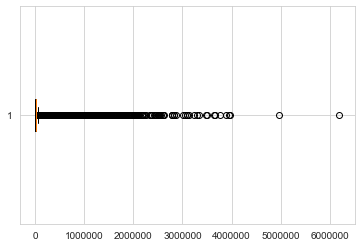

In [216]:
plt.boxplot(Mediclaim["Tot_charg"], vert=0)

# Univariate Analysis of Tot_cost

# First Moment Business Decision/ Measures of Central Tendency

In [183]:
Mediclaim.Tot_cost.mean() #10463.99
Mediclaim.Tot_cost.median() #5928.48
Mediclaim.Tot_cost.mode() #1208.47

0    1208.47
dtype: float64

# Second Moment Business Decision/ Measures of Dispersion

In [184]:
Mediclaim.Tot_cost.max() #2562477.66
Mediclaim.Tot_cost.min() #0.1
Range= Mediclaim.Tot_cost.max()-Mediclaim.Tot_cost.min()
print(Range) #2562477.56
np.var(Mediclaim["Tot_cost"]) #497452596.13
np.std(Mediclaim["Tot_cost"]) #22303.65

2562477.56


22303.645355094985

# Third Moment Business Decision
#As a general thumbrule, if the skewness is <-1 or >1, then the distribution is highly skewed
#If the skewness is between -1 to -0.5 or 0.5 to 1, then the distribution is moderately skewed
#If the skewness is between -0.5 and 0.5, then the distribution is approximately symmetric

In [185]:
Mediclaim["Tot_cost"].skew() #27.59 (Highly Skewed)

27.58967835150612

# Fourth Moment Business Decision
#Normal distribution for kurtosis is 3
#Kurtosis value greater than 3, leptokurtic
#Kurtosis value between 1 and 3, platykurtic

In [186]:
Mediclaim["Tot_cost"].kurt() #1585.23 (Leptokurtic)

1585.2266562335903

# Graphical Visualization

# Histogram of Tot_cost

(array([1.047711e+06, 6.120000e+02, 1.330000e+02, 5.700000e+01,
        2.600000e+01, 1.900000e+01, 1.100000e+01, 2.000000e+00,
        2.000000e+00, 2.000000e+00]),
 array([1.00000000e-01, 2.56247856e+05, 5.12495612e+05, 7.68743368e+05,
        1.02499112e+06, 1.28123888e+06, 1.53748664e+06, 1.79373439e+06,
        2.04998215e+06, 2.30622990e+06, 2.56247766e+06]),
 <a list of 10 Patch objects>)

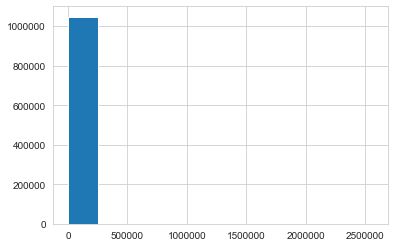

In [217]:
plt.hist(Mediclaim["Tot_cost"])

# Boxplot of Tot_cost

{'whiskers': [<matplotlib.lines.Line2D at 0x256850c77c8>,
 'caps': [<matplotlib.lines.Line2D at 0x256850c7f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2561c9252c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2561c9337c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2561c8bed88>],
 'means': []}

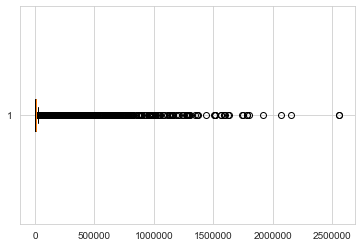

In [218]:
plt.boxplot(Mediclaim["Tot_cost"], vert=0)

# Univariate Analysis of ratio_of_total_costs_to_total_charges

# First Moment Business Decision/ Measures of Central Tendency

In [189]:
Mediclaim.ratio_of_total_costs_to_total_charges.mean() #0.46
Mediclaim.ratio_of_total_costs_to_total_charges.median() #0.41
Mediclaim.ratio_of_total_costs_to_total_charges.mode() #0.83

0    0.827984
dtype: float64

# Second Moment Business Decision/ Measures of Dispersion

In [190]:
Mediclaim.ratio_of_total_costs_to_total_charges.max() #157.56
Mediclaim.ratio_of_total_costs_to_total_charges.min() #0.033
Range= Mediclaim.ratio_of_total_costs_to_total_charges.max()-Mediclaim.ratio_of_total_costs_to_total_charges.min()
print(Range) #157.53
np.var(Mediclaim["ratio_of_total_costs_to_total_charges"]) #0.645
np.std(Mediclaim["ratio_of_total_costs_to_total_charges"]) #0.802

157.52648011


0.8029242430511975

# Third Moment Business Decision
#As a general thumbrule, if the skewness is <-1 or >1, then the distribution is highly skewed
#If the skewness is between -1 to -0.5 or 0.5 to 1, then the distribution is moderately skewed
#If the skewness is between -0.5 and 0.5, then the distribution is approximately symmetric

In [219]:
Mediclaim["ratio_of_total_costs_to_total_charges"].skew() #95.88 (Highly Skewed)

95.88300639497649

# Fourth Moment Business Decision
#Normal distribution for kurtosis is 3
#Kurtosis value greater than 3, leptokurtic
#Kurtosis value between 1 and 3, platykurtic

In [220]:
Mediclaim["ratio_of_total_costs_to_total_charges"].kurt() #11789.04 (Leptokurtic)

11789.037973247312

# Graphical Visualization

# Histogram of ratio_of_total_costs_to_total_charges

(array([1.048414e+06, 2.700000e+01, 4.800000e+01, 3.300000e+01,
        2.900000e+01, 8.000000e+00, 6.000000e+00, 6.000000e+00,
        1.000000e+00, 3.000000e+00]),
 array([3.31290900e-02, 1.57857771e+01, 3.15384251e+01, 4.72910731e+01,
        6.30437211e+01, 7.87963691e+01, 9.45490172e+01, 1.10301665e+02,
        1.26054313e+02, 1.41806961e+02, 1.57559609e+02]),
 <a list of 10 Patch objects>)

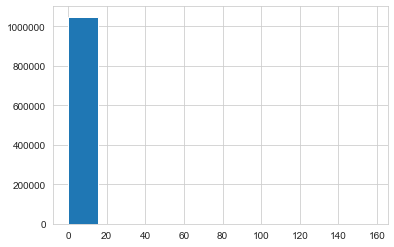

In [221]:
plt.hist(Mediclaim["ratio_of_total_costs_to_total_charges"])

# Boxplot of ratio_of_total_costs_to_total_charges

{'whiskers': [<matplotlib.lines.Line2D at 0x256236ace88>,
 'caps': [<matplotlib.lines.Line2D at 0x256236affc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x256236ac608>],
 'medians': [<matplotlib.lines.Line2D at 0x256236b2f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x256236b2f08>],
 'means': []}

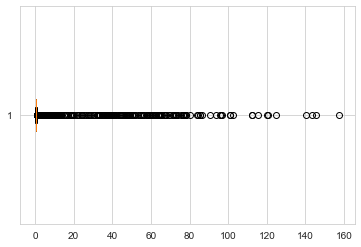

In [222]:
plt.boxplot(Mediclaim["ratio_of_total_costs_to_total_charges"], vert=0)

# Visualization of categorical variables

In [223]:
def plot_bar(Mediclaim, cols):
    for col in cols:
        fig= plt.figure(figsize=(8,8))
        ax= fig.gca() #Defining axis
        count= Mediclaim[col].value_counts()
        count.plot.bar(ax=ax, color='red')
        ax.set_title('Bar plot of '+ col)
        ax.set_xlabel(col)
        ax.set_ylabel('Counts')
        plt.show()
        

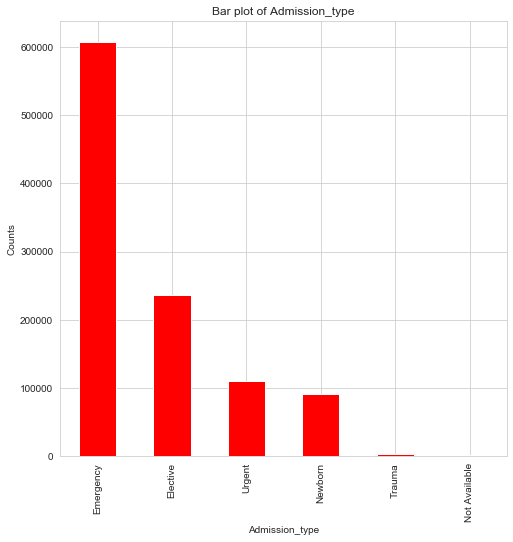

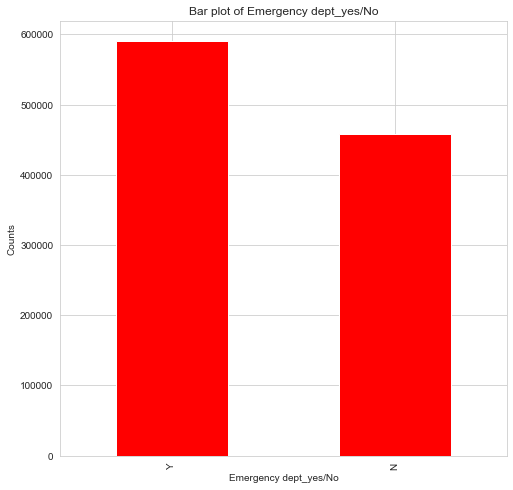

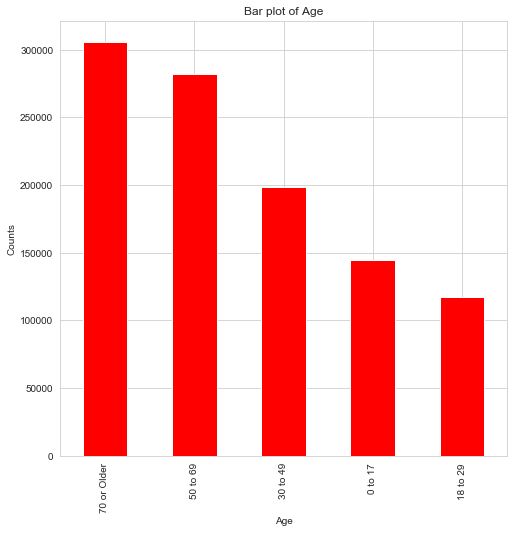

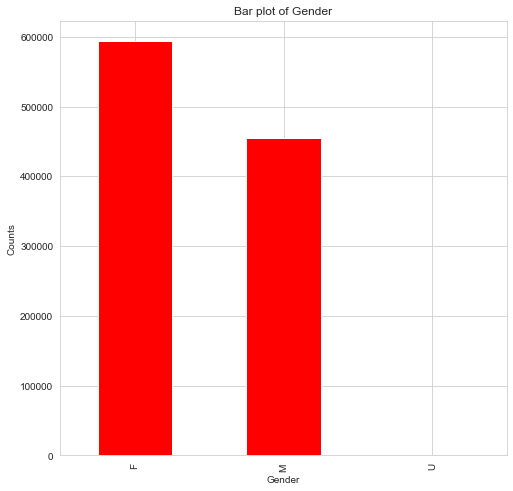

In [224]:
plot_cols=['Admission_type','Emergency dept_yes/No','Age','Gender']
plot_bar(Mediclaim,plot_cols)

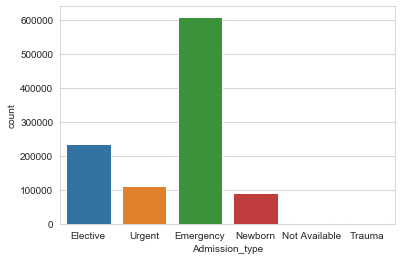

In [225]:
sns.set_style('whitegrid')
sns.countplot(x='Admission_type',data=Mediclaim)

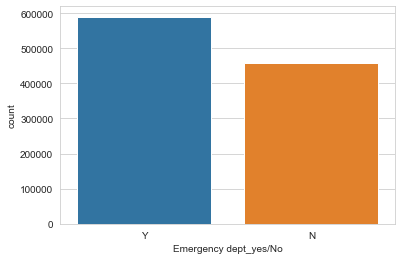

In [226]:
sns.set_style('whitegrid')
sns.countplot(x='Emergency dept_yes/No',data=Mediclaim)

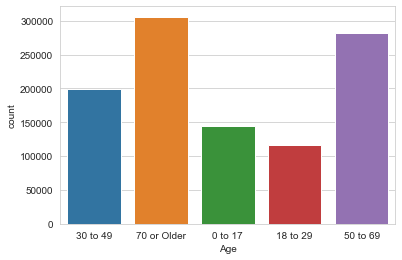

In [227]:
sns.set_style('whitegrid')
sns.countplot(x='Age',data=Mediclaim)

# Bivariate Analysis

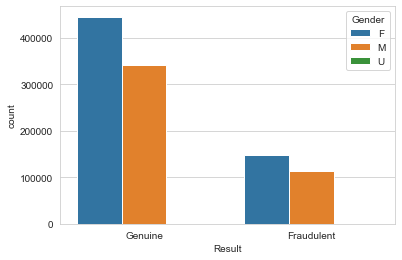

In [228]:
sns.set_style('whitegrid')
sns.countplot(x='Result', hue='Gender',data=Mediclaim)

### From the above plot, it can be inferred that the proportion of both genuine as well as fraudulent claims made by the female population is higher than male population ###

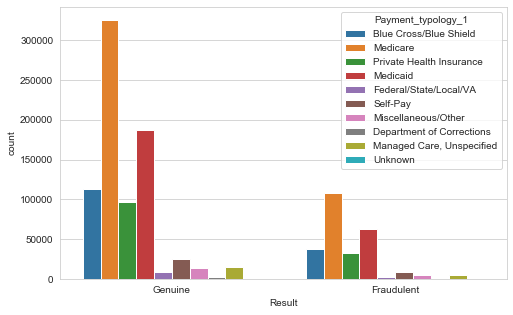

In [229]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x='Result',hue='Payment_typology_1',data=Mediclaim)

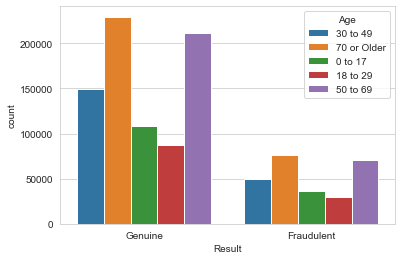

In [230]:
sns.set_style('whitegrid')
sns.countplot(x='Result',hue='Age',data=Mediclaim)

### Inference that can be drawn is that people aged 70 or Older are the ones making the highest claims that are genuine and at the same time making most fraudulent claims as well when compared to other age groups ###

# Building Decision Tree Model

In [231]:
from sklearn.preprocessing import LabelEncoder
lb_make= LabelEncoder()
Mediclaim['Hospital Name']= lb_make.fit_transform(Mediclaim['Hospital Name'])
Mediclaim['Age']=lb_make.fit_transform(Mediclaim['Age'])
Mediclaim['Gender']=lb_make.fit_transform(Mediclaim['Gender'])
Mediclaim['Cultural_group']=lb_make.fit_transform(Mediclaim['Cultural_group'])
Mediclaim['Admission_type']=lb_make.fit_transform(Mediclaim['Admission_type'])
Mediclaim['Home or self care,']=lb_make.fit_transform(Mediclaim['Home or self care,'])
Mediclaim['ccs_diagnosis_description']=lb_make.fit_transform(Mediclaim['ccs_diagnosis_description'])
Mediclaim['ccs_procedure_description']=lb_make.fit_transform(Mediclaim['ccs_procedure_description'])
Mediclaim['apr_drg_description']=lb_make.fit_transform(Mediclaim['apr_drg_description'])
Mediclaim['apr_mdc_description']=lb_make.fit_transform(Mediclaim['apr_mdc_description'])
Mediclaim['Description_illness']=lb_make.fit_transform(Mediclaim['Description_illness'])
Mediclaim['Mortality risk']=lb_make.fit_transform(Mediclaim['Mortality risk'])
Mediclaim['Surg_Description']=lb_make.fit_transform(Mediclaim['Surg_Description'])
Mediclaim['Payment_typology_1']=lb_make.fit_transform(Mediclaim['Payment_typology_1'])
Mediclaim['Days_spend_hsptl']=lb_make.fit_transform(Mediclaim['Days_spend_hsptl'])
Mediclaim['Emergency dept_yes/No']=lb_make.fit_transform(Mediclaim['Emergency dept_yes/No'])
Mediclaim['Result']=lb_make.fit_transform(Mediclaim['Result'])

In [232]:
Mediclaim.shape

(1048575, 21)

In [233]:
Mediclaim['Result'].unique()

array([1, 0], dtype=int64)

In [234]:
Mediclaim['Result'].value_counts()

1    786407
0    262168
Name: Result, dtype: int64

In [235]:
colnames= list(Mediclaim.columns)
colnames

['Hospital Name',
 'Age',
 'Gender',
 'Cultural_group',
 'Days_spend_hsptl',
 'Admission_type',
 'Home or self care,',
 'ccs_diagnosis_description',
 'ccs_procedure_description',
 'apr_drg_description',
 'apr_mdc_description',
 'Code_illness',
 'Description_illness',
 'Mortality risk',
 'Surg_Description',
 'Payment_typology_1',
 'Emergency dept_yes/No',
 'Tot_charg',
 'Tot_cost',
 'ratio_of_total_costs_to_total_charges',
 'Result']

In [236]:
predictors= colnames[:20]
predictors

['Hospital Name',
 'Age',
 'Gender',
 'Cultural_group',
 'Days_spend_hsptl',
 'Admission_type',
 'Home or self care,',
 'ccs_diagnosis_description',
 'ccs_procedure_description',
 'apr_drg_description',
 'apr_mdc_description',
 'Code_illness',
 'Description_illness',
 'Mortality risk',
 'Surg_Description',
 'Payment_typology_1',
 'Emergency dept_yes/No',
 'Tot_charg',
 'Tot_cost',
 'ratio_of_total_costs_to_total_charges']

In [237]:
target=colnames[20]
target

'Result'

In [238]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(Mediclaim, test_size=0.3)

In [239]:
from sklearn.tree import DecisionTreeClassifier

In [240]:
model= DecisionTreeClassifier(criterion='entropy')

In [241]:
model.fit(train[predictors],train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [242]:
pred_train= model.predict(train[predictors])

In [243]:
pd.crosstab(train[target],pred_train)

col_0,0,1
Result,,
0,181920,1629
1,1355,549098


In [244]:
np.mean(pred_train== train.Result)

0.9959346159819727

In [245]:
pred_test= model.predict(test[predictors])

In [246]:
pd.crosstab(test[target],pred_test)

col_0,0,1
Result,,
0,20649,57970
1,62172,173782


In [247]:
#Measuring the accuracy of the model on the test set
np.mean(pred_test==test[target])

0.6180791104131632